# Global Terrorism EDA Case Study

In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

### Data Reading & Data Types 

In [2]:
#Read the data in pandas

terror_data = pd.read_csv("globalterrorism.csv", encoding='latin-1')

In [3]:
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Check the shape of dataset

terror_data.shape

(181691, 135)

In [5]:
## Print the information about the attributes of terror_data

terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
# Print the columns name

terror_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Using necessary columns for further analysis as the major of the columns have NUll values

terror_data1 = terror_data[['eventid','iyear','imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude',
                            'attacktype1_txt','nkill','nwound','target1','summary','gname','targtype1_txt', 'targsubtype1_txt',
                            'weaptype1_txt','motive']]

In [8]:
# Rename the coulmns of better readability and understanding

terror_data1.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                             'provstate':'State','region_txt':'Region','city':'City','latitude':'Latitude',
                             'longitude':'Longitude','attacktype1_txt':'AttackType','targtype1_txt':'TargetType',
                             'targsubtype1_txt':'TargetSubType','weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','motive':'Motive','target1':'Target'},inplace=True)

In [9]:
terror_data1.head()

,Event_ID,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,TargetSubType,WeaponType,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Named Civilian,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Embassy/Consulate,Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN


In [10]:
# Check the rename columns

terror_data1.columns

Index(['Event_ID', 'Year', 'Month', 'Day', 'Country', 'State', 'Region',
       'City', 'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'TargetType', 'TargetSubType',
       'WeaponType', 'Motive'],
      dtype='object')

In [11]:
# Check for the missing values

terror_data1.isnull().sum()

Event_ID              0
Year                  0
Month                 0
Day                   0
Country               0
State               421
Region                0
City                434
Latitude           4556
Longitude          4557
AttackType            0
Killed            10313
Wounded           16311
Target              636
Summary           66129
Group                 0
TargetType            0
TargetSubType     10373
WeaponType            0
Motive           131130
dtype: int64

In [12]:
# Print the missing value percentage

round((terror_data1.isnull().sum()/len(terror_data1.index)*100),2)

Event_ID          0.00
Year              0.00
Month             0.00
Day               0.00
Country           0.00
State             0.23
Region            0.00
City              0.24
Latitude          2.51
Longitude         2.51
AttackType        0.00
Killed            5.68
Wounded           8.98
Target            0.35
Summary          36.40
Group             0.00
TargetType        0.00
TargetSubType     5.71
WeaponType        0.00
Motive           72.17
dtype: float64

In [13]:
# Drop the columns in "Terror Data" which have more than 40% of missing values.

terror_data1.drop(["Motive"], axis=1, inplace=True)

In [14]:
# Replace NaN values with 0 in columns "Killed" and "Wounded"

terror_data1['Wounded'] = terror_data1['Wounded'].fillna(0)
terror_data1['Killed'] = terror_data1['Killed'].fillna(0)

In [15]:
# Check again the missing value percentage

round((terror_data1.isnull().sum()/len(terror_data1.index)*100),2)

Event_ID          0.00
Year              0.00
Month             0.00
Day               0.00
Country           0.00
State             0.23
Region            0.00
City              0.24
Latitude          2.51
Longitude         2.51
AttackType        0.00
Killed            0.00
Wounded           0.00
Target            0.35
Summary          36.40
Group             0.00
TargetType        0.00
TargetSubType     5.71
WeaponType        0.00
dtype: float64

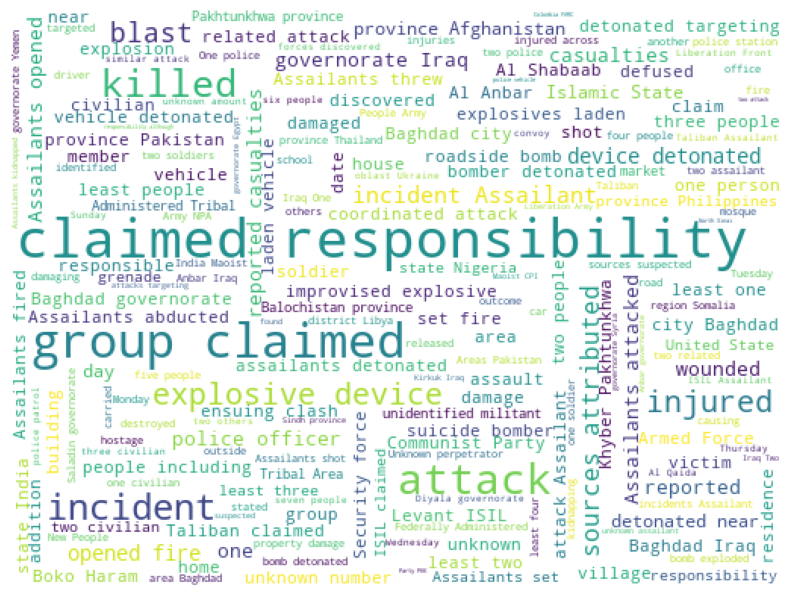

In [16]:
from wordcloud import WordCloud
from scipy import signal
suummary_words = terror_data1.Summary.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(suummary_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


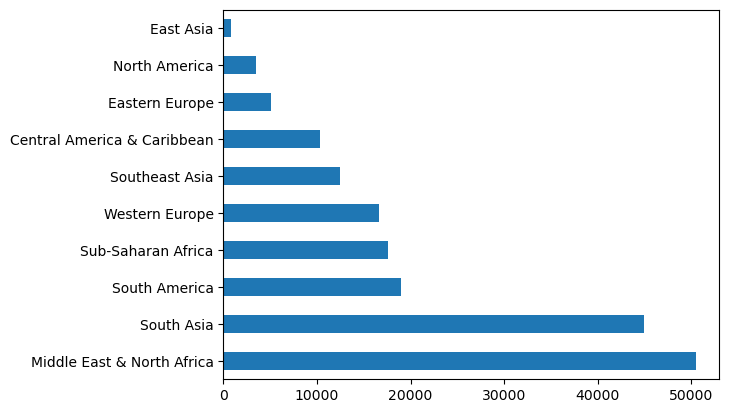

In [17]:
# Print the attack counts and plot the chart of TOP-10 regions in the "Region" variable.

print(terror_data1.Region.value_counts()[:10])
terror_data1.Region.value_counts()[:10].plot.barh();

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


Text(0.5, 1.0, 'Top-10 Countries with Most Attacks')

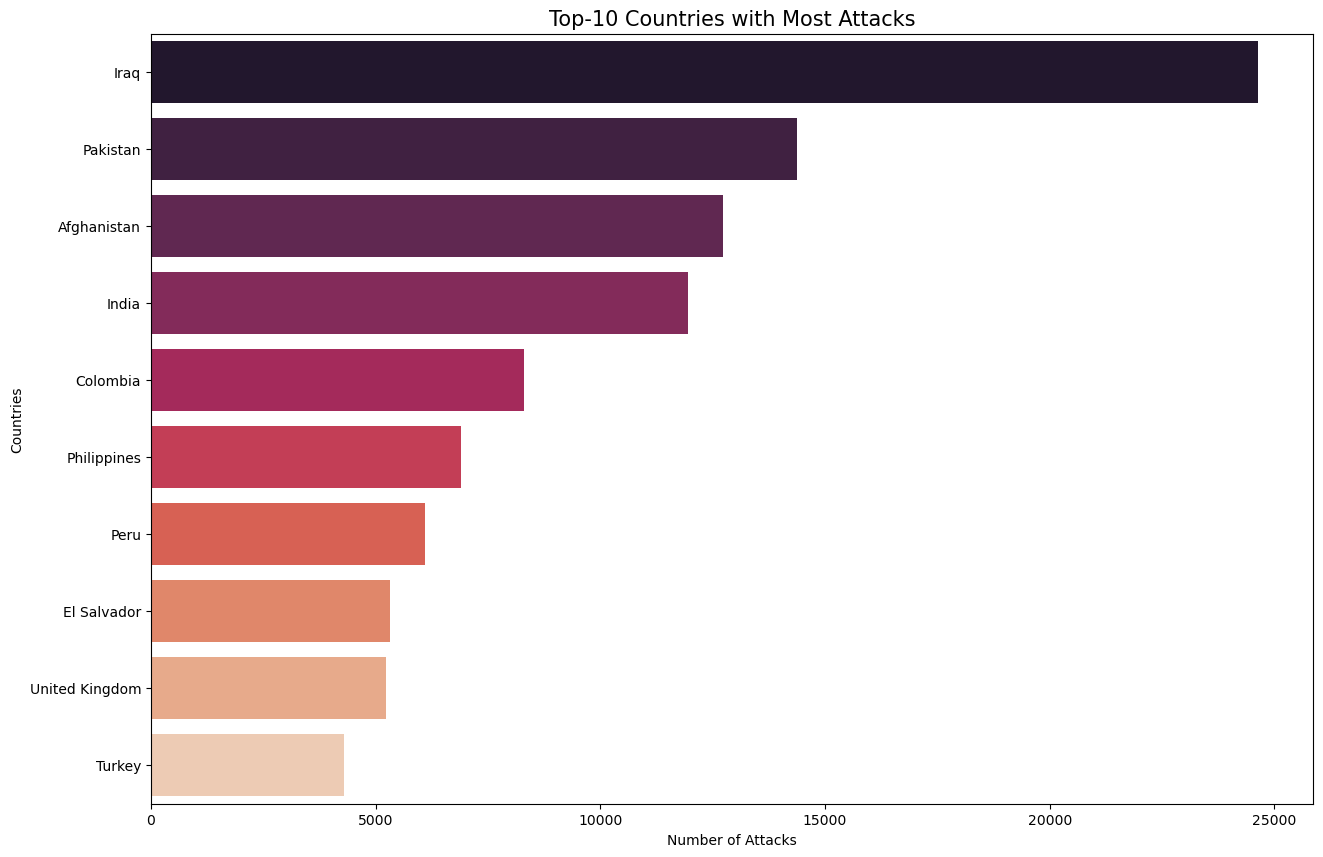

In [18]:
# Print the attack counts and plot the chart of TOP-10 countries in the "Country" variable.

print(terror_data1.Country.value_counts()[:10])

top10_country= terror_data1["Country"].value_counts().head(10)

plt.figure(figsize=(15,10))
sns.barplot(x = top10_country.values, y = top10_country.index, palette = 'rocket', orient='h')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10 Countries with Most Attacks', size=15)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


Text(0.5, 1.0, 'Top-10: States with Most Attacks')

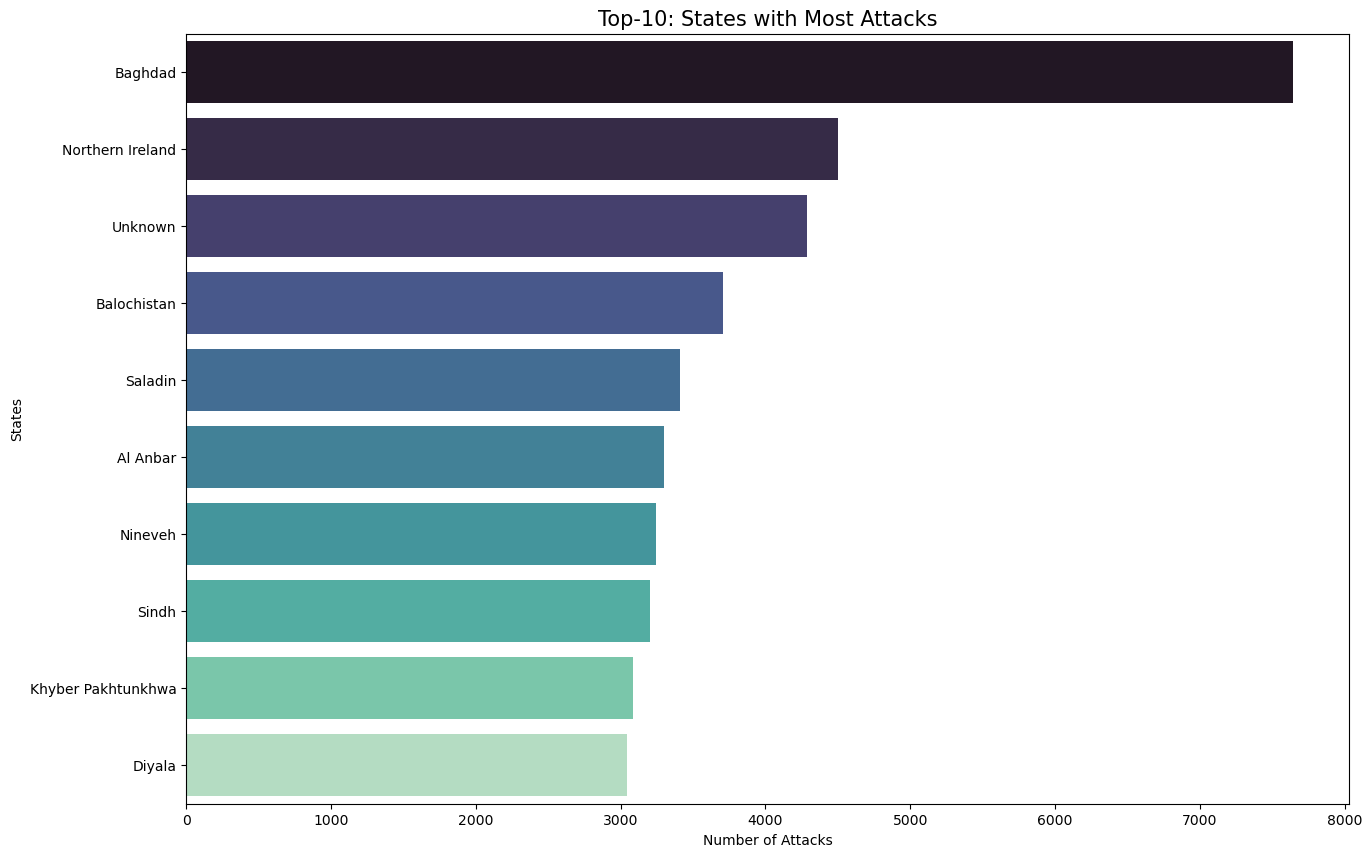

In [19]:
# Print the attack counts and plot the chart of TOP-10 states in the "State" variable.

print(terror_data1.State.value_counts()[:10])

top10_state= terror_data1["State"].value_counts().head(10)

plt.figure(figsize=(15,10))
sns.barplot(x = top10_state.values, y = top10_state.index, palette = 'mako', orient='h')
plt.xlabel('Number of Attacks')
plt.ylabel('States')
plt.title('Top-10: States with Most Attacks', size=15)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64


Text(0.5, 1.0, 'Top-10: Cities with Most Attacks')

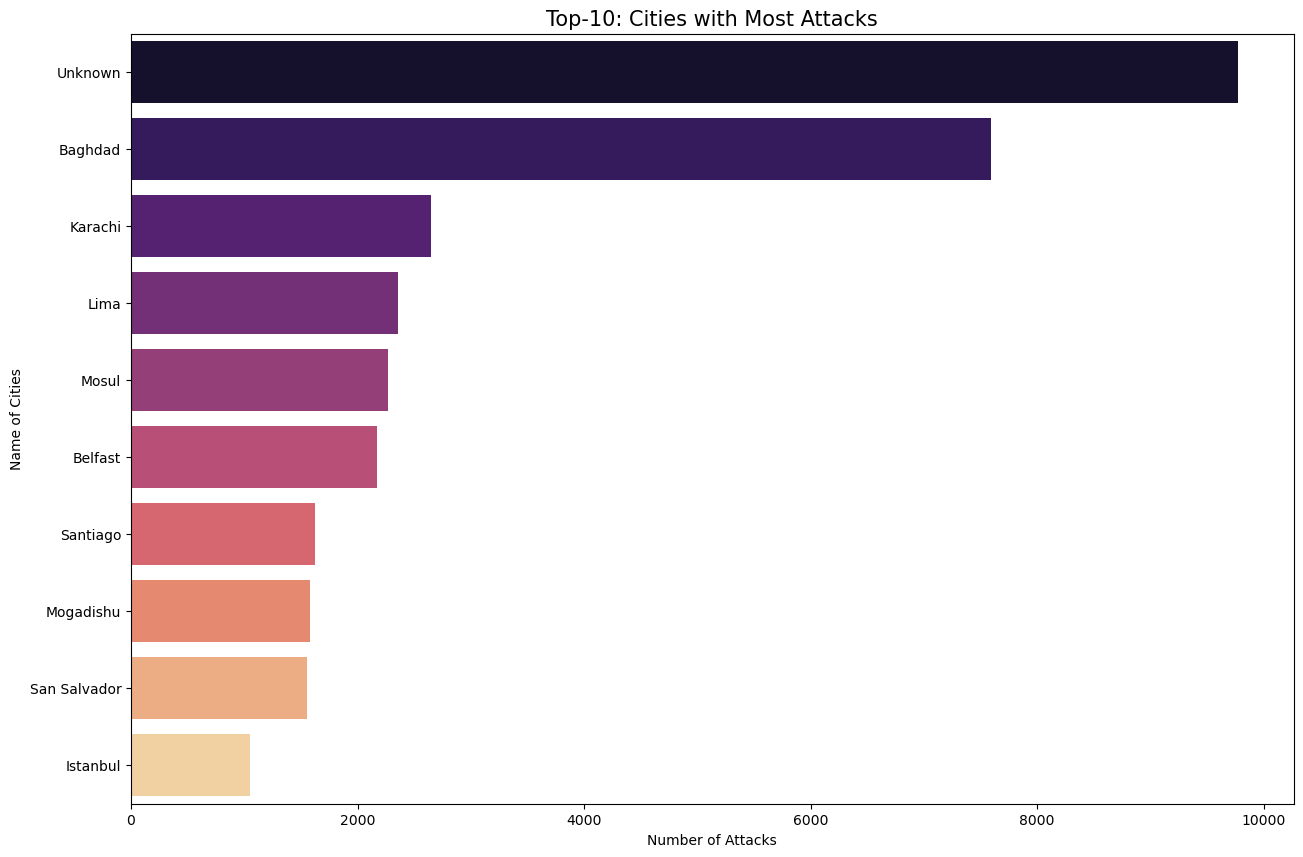

In [20]:
# Print the attack counts and plot the chart of TOP-10 cities in the "City" variable.

print(terror_data1.City.value_counts()[:10])

top10_city= terror_data1["City"].value_counts().head(10)

plt.figure(figsize=(15,10))
sns.barplot(x = top10_city.values, y = top10_city.index, palette = 'magma', orient='h')
plt.xlabel('Number of Attacks')
plt.ylabel('Name of Cities')
plt.title('Top-10: Cities with Most Attacks', size=15)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


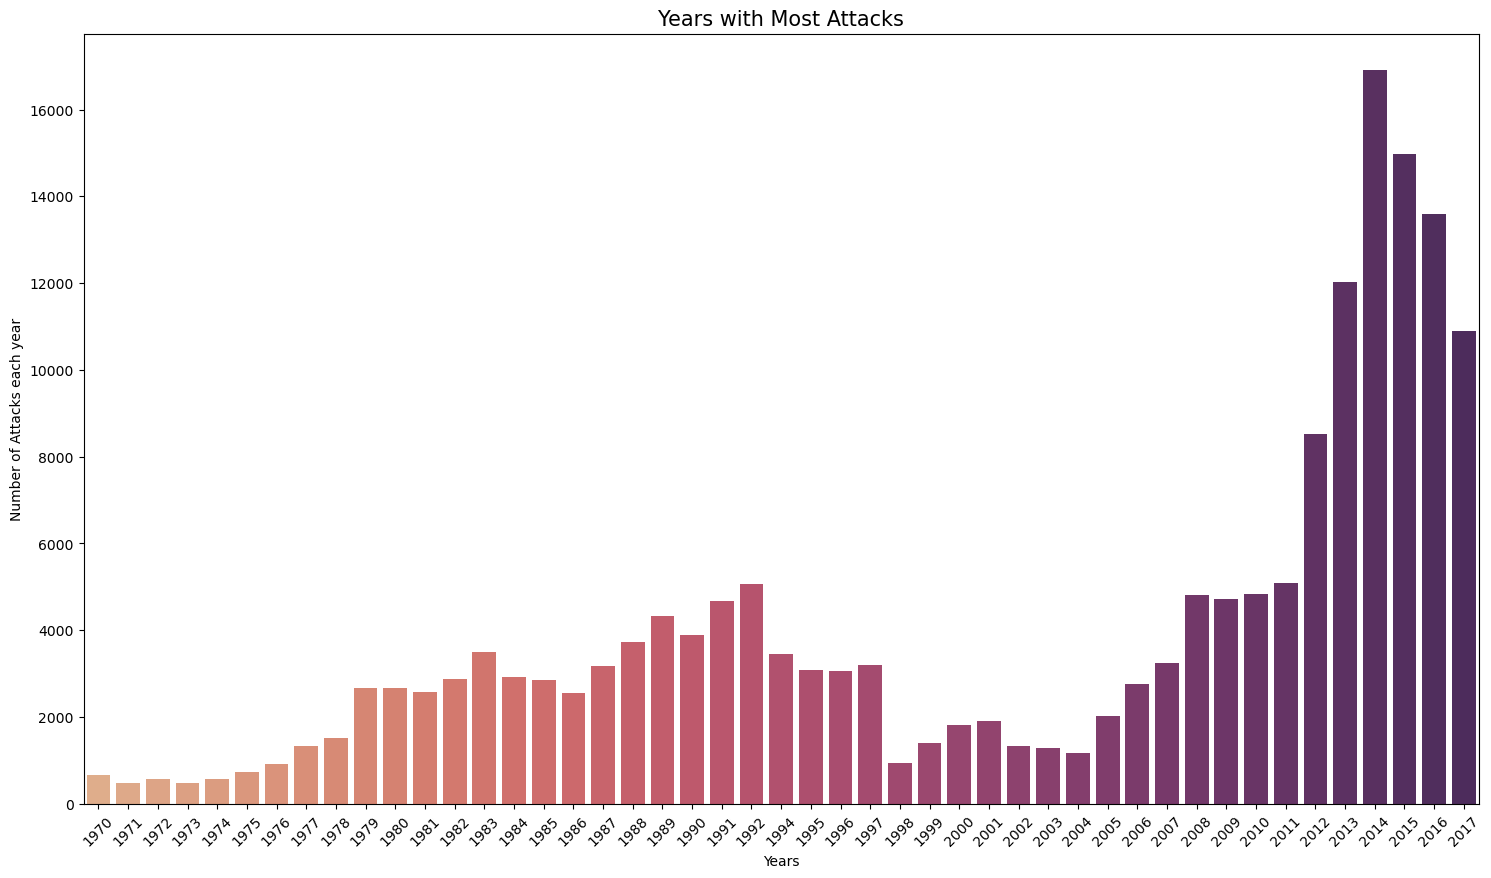

In [21]:
# Print the attack counts of TOP-10 years in the "Year" variable.

print(terror_data1.Year.value_counts()[:10])


# Plot the attack count in each year

x_year = terror_data1['Year'].unique()
y_count_years = terror_data1['Year'].value_counts().sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'flare')
plt.xticks(rotation = 45)
plt.xlabel('Years')
plt.ylabel('Number of Attacks each year')
plt.title('Years with Most Attacks', size=15)
plt.show()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
Name: Month, dtype: int64


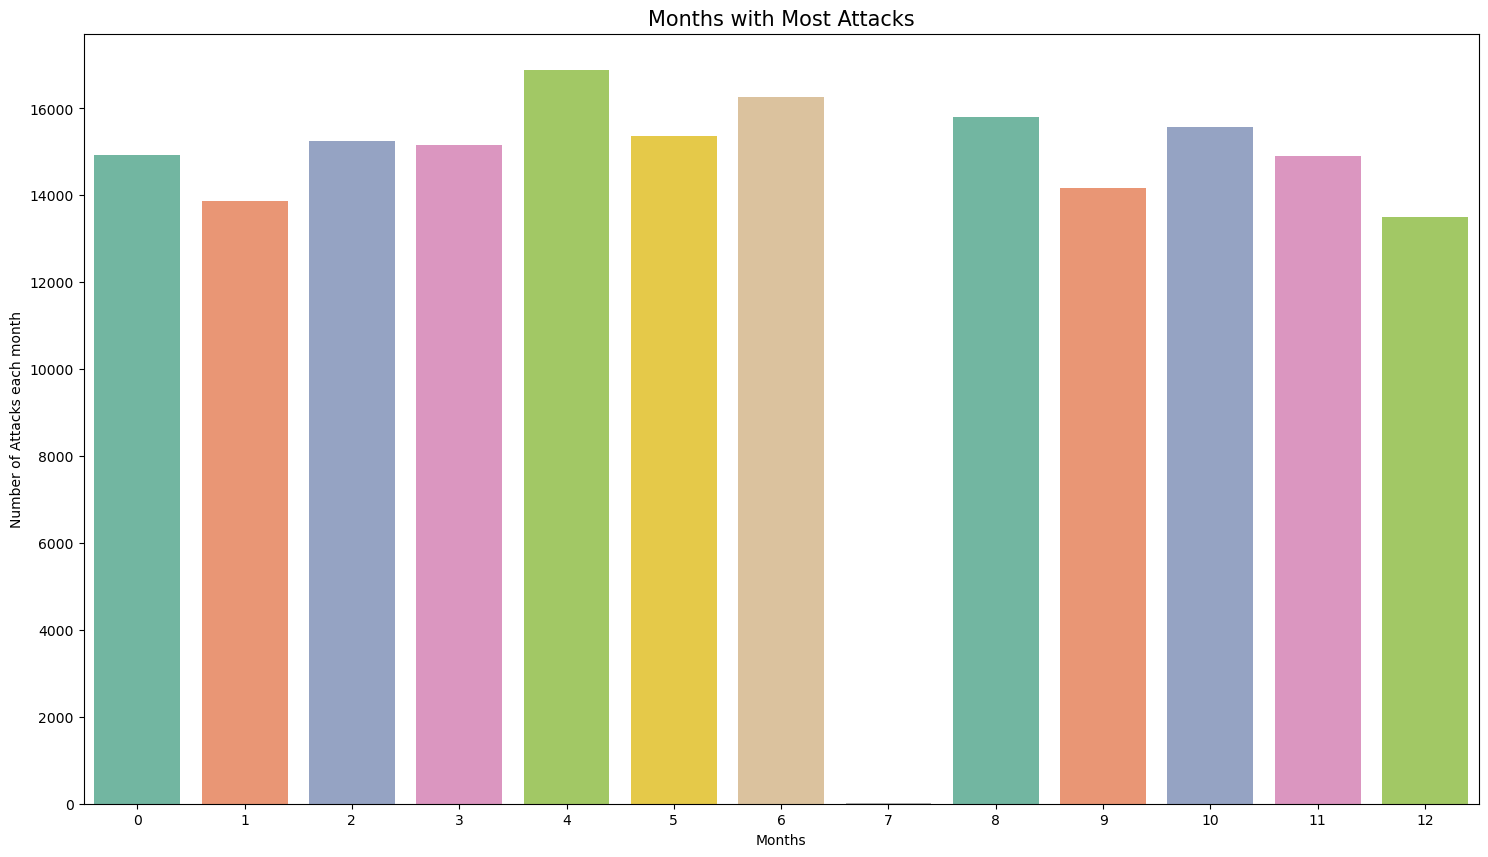

In [22]:
# Print the attack counts of TOP-10 months in the "Month" variable.

print(terror_data1.Month.value_counts()[:10])


# Plot the attack count in each month

x_mon = terror_data1['Month'].unique()
y_count_mon = terror_data1['Month'].value_counts().sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_mon,
           y = y_count_mon,
           palette = 'Set2')
plt.xlabel('Months')
plt.ylabel('Number of Attacks each month')
plt.title('Months with Most Attacks', size=15)
plt.show()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


Text(0.5, 1.0, 'Groups with Most Attacks')

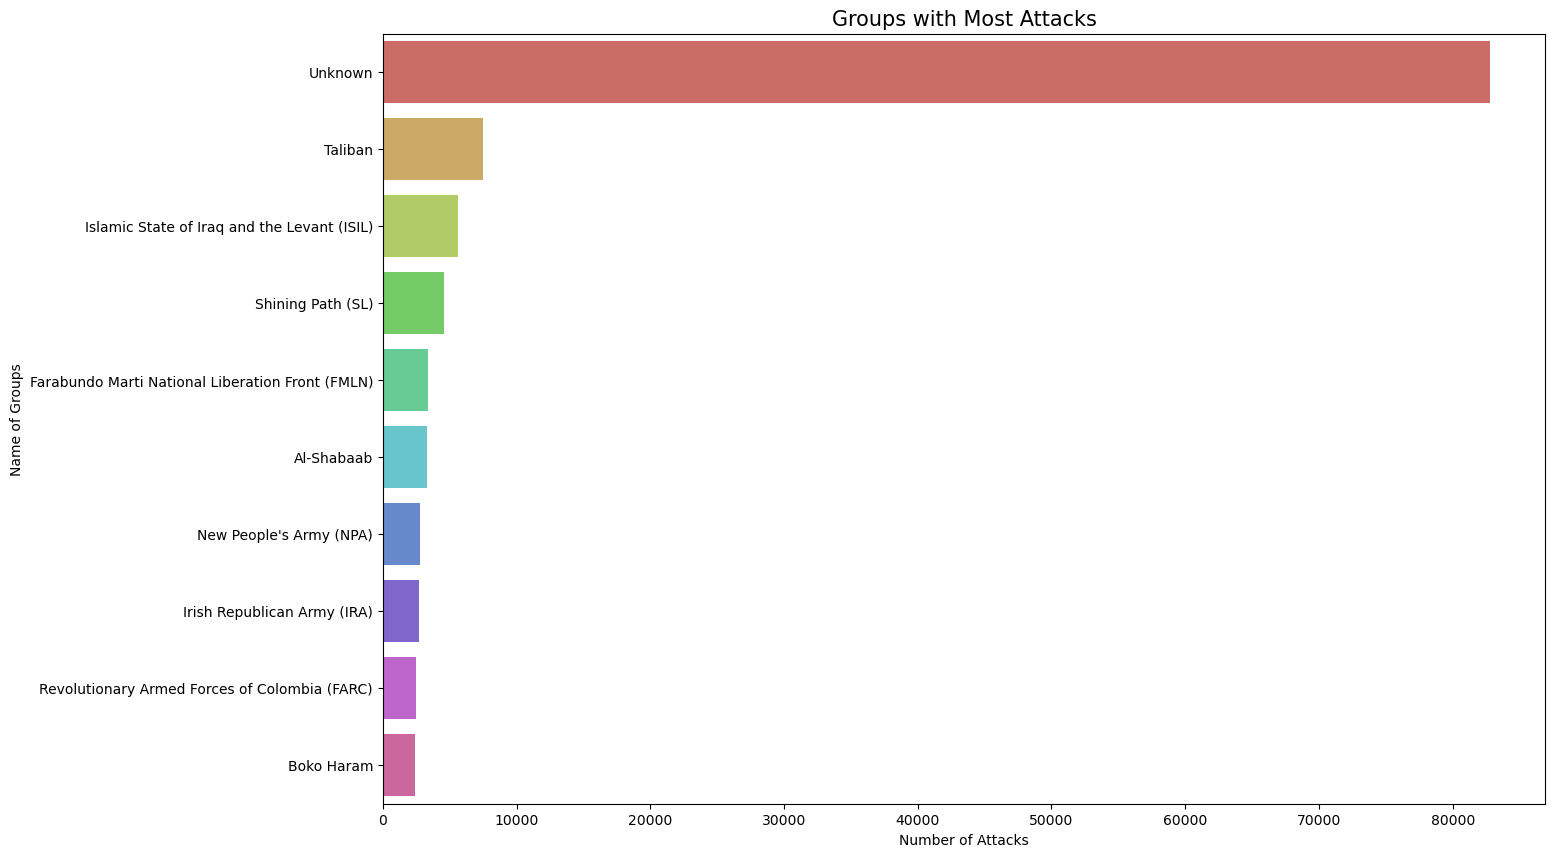

In [23]:
# Print the attack counts for Top-10 groups in the "Group" variable.

print(terror_data1.Group.value_counts().head(10))


# Plot the attack count of Top=10 groups

plt.figure(figsize=(15,10))
sns.barplot(x = terror_data1["Group"].value_counts()[:10], y = terror_data1["Group"].value_counts().index[:10], 
            palette = 'hls', orient='h')
plt.xlabel('Number of Attacks')
plt.ylabel('Name of Groups')
plt.title('Groups with Most Attacks', size=15)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


Text(0.5, 1.0, 'Most Type of Attacks')

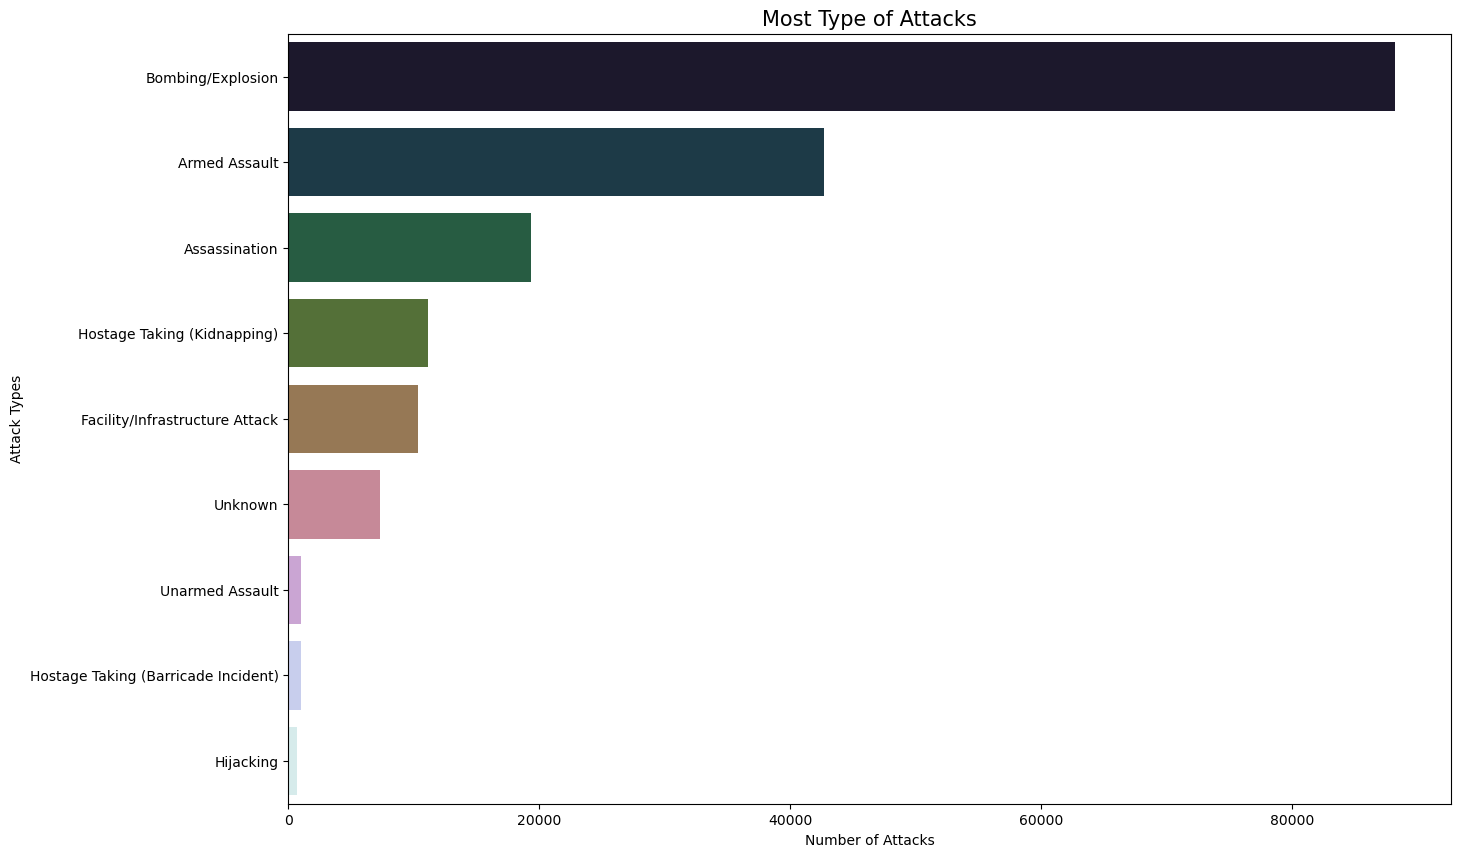

In [24]:
# Print the attack counts of each types in the "AttackType" variable.

print(terror_data1.AttackType.value_counts())


# Plot the attack count of each type

plt.figure(figsize=(15,10))
sns.barplot(x = terror_data1["AttackType"].value_counts(), y = terror_data1["AttackType"].value_counts().index, 
            palette = 'cubehelix', orient='h')
plt.ylabel('Attack Types')
plt.xlabel('Number of Attacks')
plt.title('Most Type of Attacks', size=15)

Civilians        6461
Unknown          5918
Soldiers         3157
Patrol           2942
Checkpoint       2905
Vehicle          2785
Officers         1787
Village          1679
Military Unit    1533
Bus              1335
Name: Target, dtype: int64


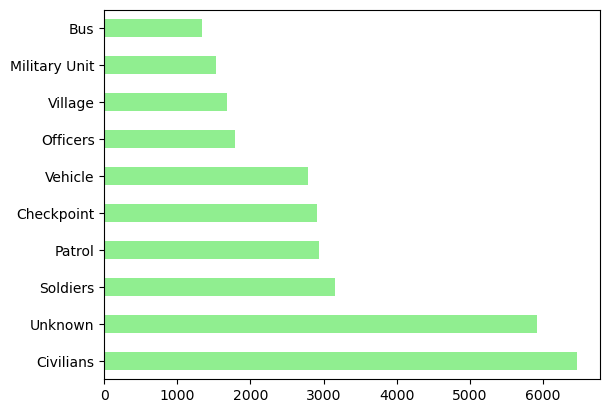

In [25]:
# Print the attack counts and plot the chart of TOP-10 target in the "Target" variable.

print(terror_data1.Target.value_counts()[:10])
terror_data1.Target.value_counts()[:10].plot.barh(color="lightgreen");

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: TargetType, dtype: int64


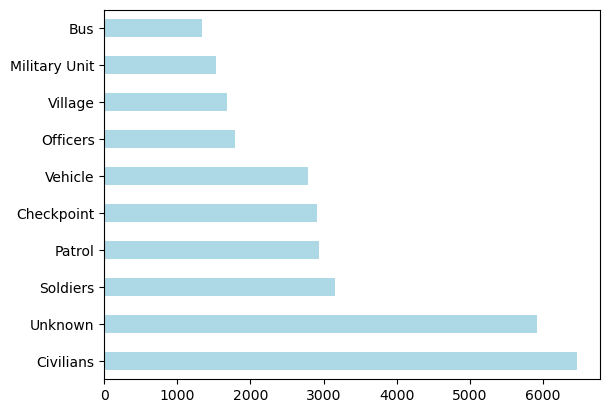

In [26]:
# Print the attack counts and plot the chart of TOP-10 target type in the "TargetType" variable.

print(terror_data1.TargetType.value_counts()[:10])
terror_data1.Target.value_counts()[:10].plot.barh(color="lightblue");

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Name: TargetSubType, dtype: int64


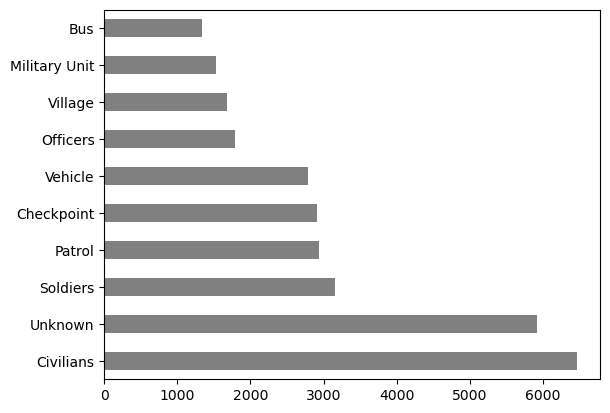

In [27]:
# Print the attack counts and plot the chart of TOP-10 target subtypes in the "TargetSubType" variable.

print(terror_data1.TargetSubType.value_counts()[:10])
terror_data1.Target.value_counts()[:10].plot.barh(color="grey");

### Quick Summary

In [28]:
print("Region with the most attacks:",terror_data1['Region'].value_counts().idxmax())
print("Country with the most attacks:",terror_data1['Country'].value_counts().idxmax())
print("State with the most attacks:",terror_data1['State'].value_counts().idxmax())
print("City with the most attacks:",terror_data1['City'].value_counts().index[1])
print("Year with the most attacks:",terror_data1['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_data1['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_data1['Group'].value_counts().index[1])
print("Target with Most Attacks:",terror_data1['Target'].value_counts().idxmax())
print("Target Types with Most Attacks:",terror_data1['TargetType'].value_counts().idxmax())
print("Target Subtypes with Most Attacks:",terror_data1['TargetSubType'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa
Country with the most attacks: Iraq
State with the most attacks: Baghdad
City with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Target with Most Attacks: Civilians
Target Types with Most Attacks: Private Citizens & Property
Target Subtypes with Most Attacks: Unnamed Civilian/Unspecified


### Bivariate and Multivariate Analysis

Text(0, 0.5, 'No. of Attacks')

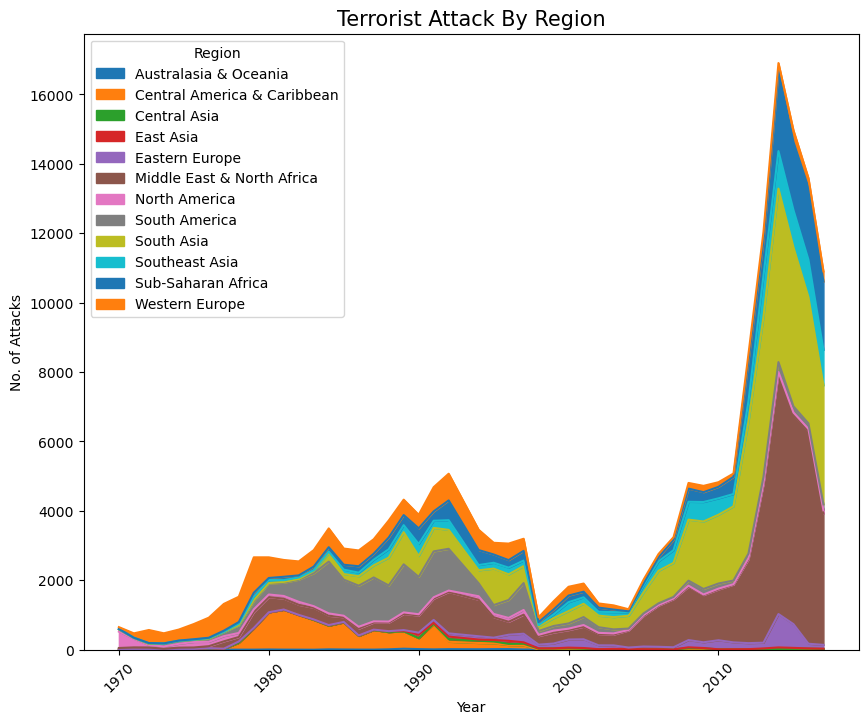

In [29]:
# Analyzing the number of attacks in each year with respect to each region

pd.crosstab(terror_data1.Year,terror_data1.Region).plot(kind="area",figsize=(10,8))
plt.title('Terrorist Attack By Region',size=15)
plt.xticks(rotation=45)
plt.ylabel('No. of Attacks')

Text(0, 0.5, 'No. of Attacks')

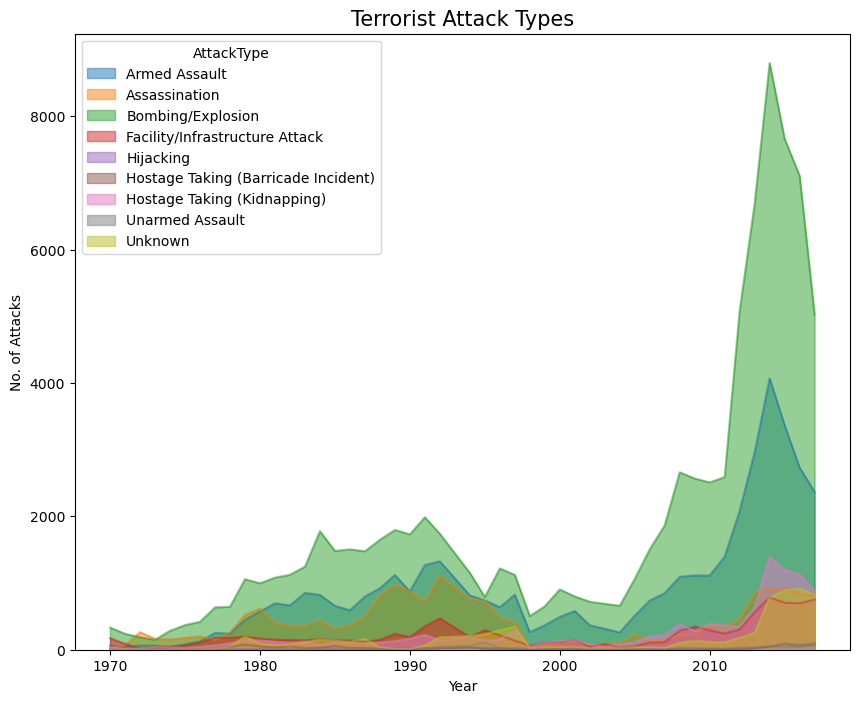

In [30]:
# Analyzing the number of attacks in each year with respect to attack types

pd.crosstab(terror_data1.Year,terror_data1.AttackType).plot(kind="area",stacked=False,figsize=(10,8))
plt.title('Terrorist Attack Types',size=15)
plt.ylabel('No. of Attacks')

Text(0, 0.5, 'No. of Attacks')

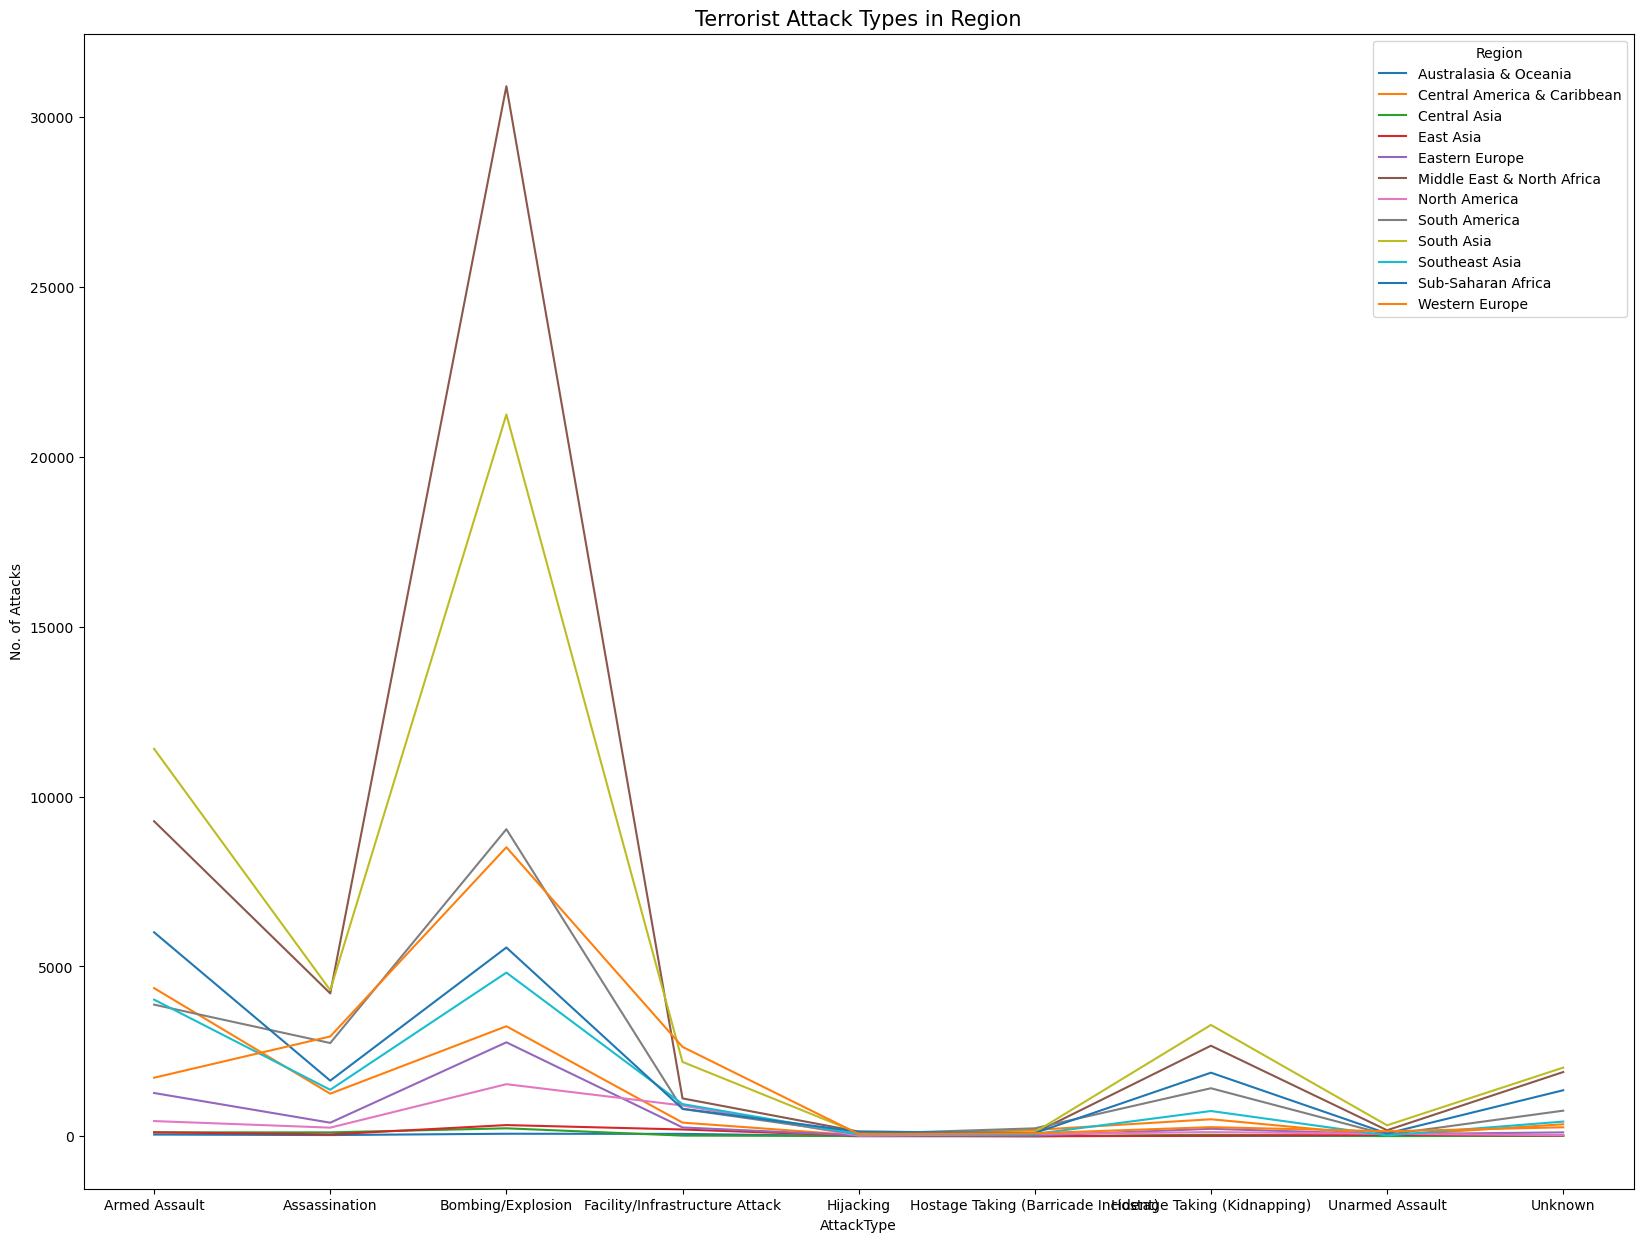

In [31]:
# Analyzing the number of attacks in each region with respect to attack types

pd.crosstab(terror_data1.AttackType,terror_data1.Region).plot(kind="line",figsize=(20,15))
plt.title('Terrorist Attack Types in Region',size=15)
plt.ylabel('No. of Attacks')

In [32]:
#creating new column casualties having data of killed and Wounded

terror_data1['Casualties'] = terror_data1['Killed'] + terror_data1['Wounded']

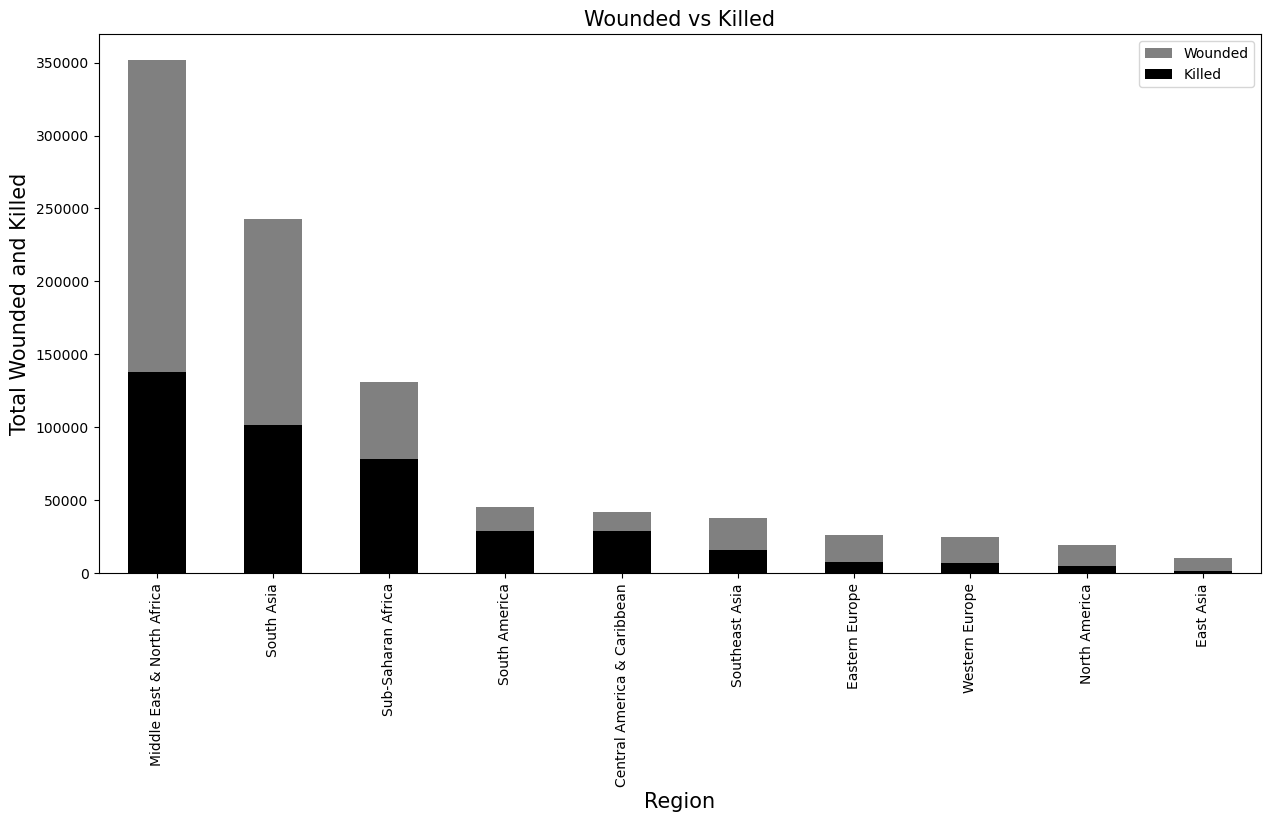

In [33]:
# Wounded vs Killed with respect to Region

Casualty = terror_data1.groupby('Region').sum()['Casualties'].nlargest(n=10) #top 10 states with highest sales
killed = terror_data1.groupby('Region').sum()['Killed'].nlargest(n=10) #top 10 states with highest sales

Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'grey', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='black', label = 'Killed')
plt.xlabel('Region',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

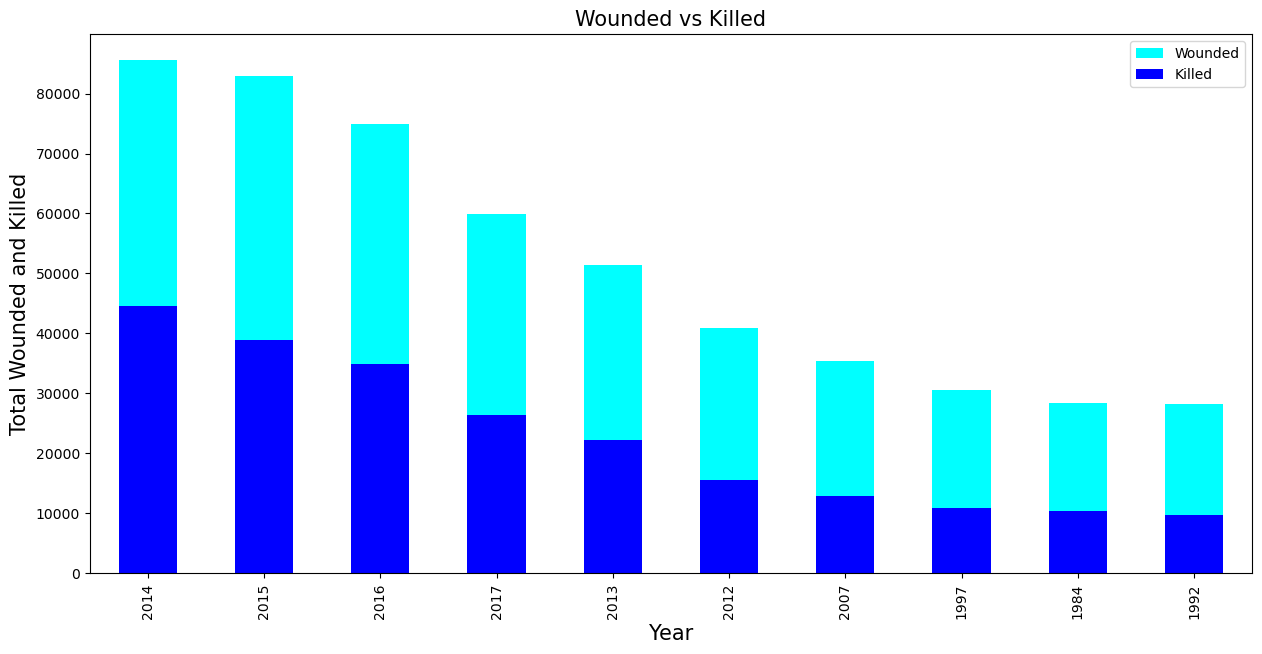

In [34]:
# Wounded vs Killed with respect to Year

Casualty = terror_data1.groupby('Year').sum()['Casualties'].nlargest(n=10) #top 10 states with highest sales
killed = terror_data1.groupby('Year').sum()['Killed'].nlargest(n=10) #top 10 states with highest sales

Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'cyan', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='blue', label = 'Killed')
plt.xlabel('Year',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

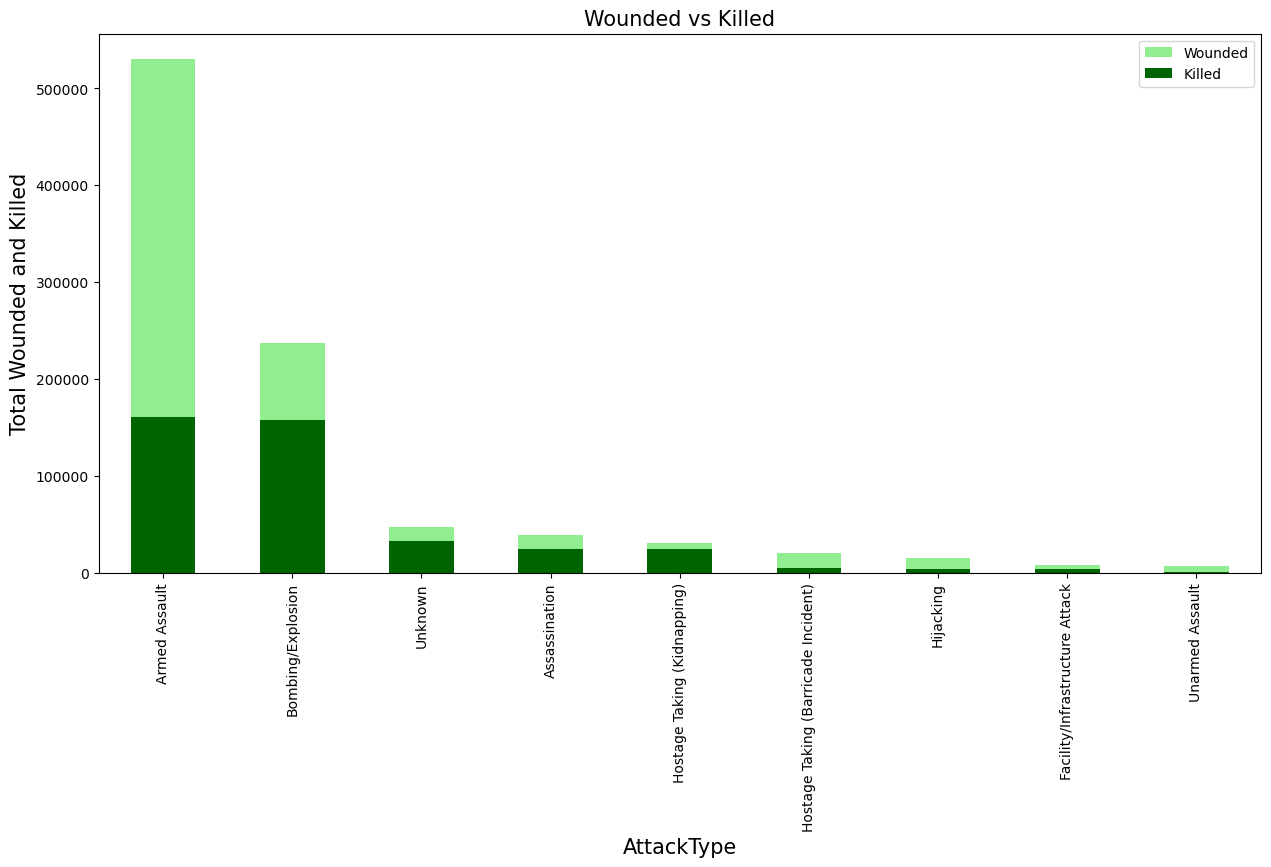

In [35]:
# Wounded vs Killed with respect to AttackType

Casualty = terror_data1.groupby('AttackType').sum()['Casualties'].nlargest(n=10) #top 10 states with highest sales
killed = terror_data1.groupby('AttackType').sum()['Killed'].nlargest(n=10) #top 10 states with highest sales

Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'lightgreen', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='darkgreen', label = 'Killed')\

plt.xlabel('AttackType',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

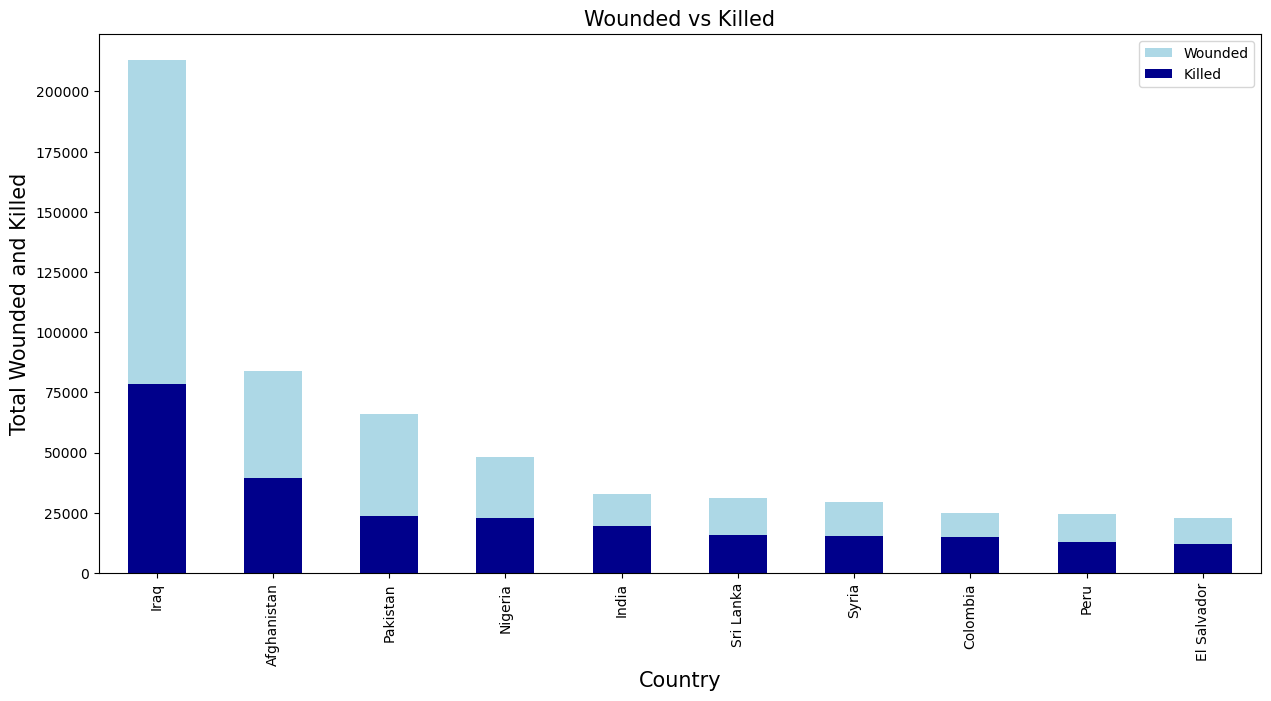

In [36]:
# Wounded vs Killed with respect to Country

Casualty = terror_data1.groupby('Country').sum()['Casualties'].nlargest(n=10) #top 10 states with highest sales
killed = terror_data1.groupby('Country').sum()['Killed'].nlargest(n=10) #top 10 states with highest sales

Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'lightblue', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='darkblue', label = 'Killed')\

plt.xlabel('Country',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

### Terrorism Analysis for Middle East & North Africa - Region

In [37]:
#Preparing the data for analysis
region_mideast = terror_data1[terror_data1.Region == 'Middle East & North Africa']
mideast_country = region_mideast.groupby(by='Country',as_index=False).count().sort_values(by='Event_ID',
                                                                                         ascending=False).iloc[:5,]

mideast_killed_size = region_mideast['Killed'].sum() / len(region_mideast)
labels = ['Killed', 'Not Killed']

mideast_year = region_mideast.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

mideast_weapon = region_mideast.groupby(by='WeaponType',as_index=False).count().sort_values(by='Event_ID',
                                                                                            ascending=False).iloc[:,:2]

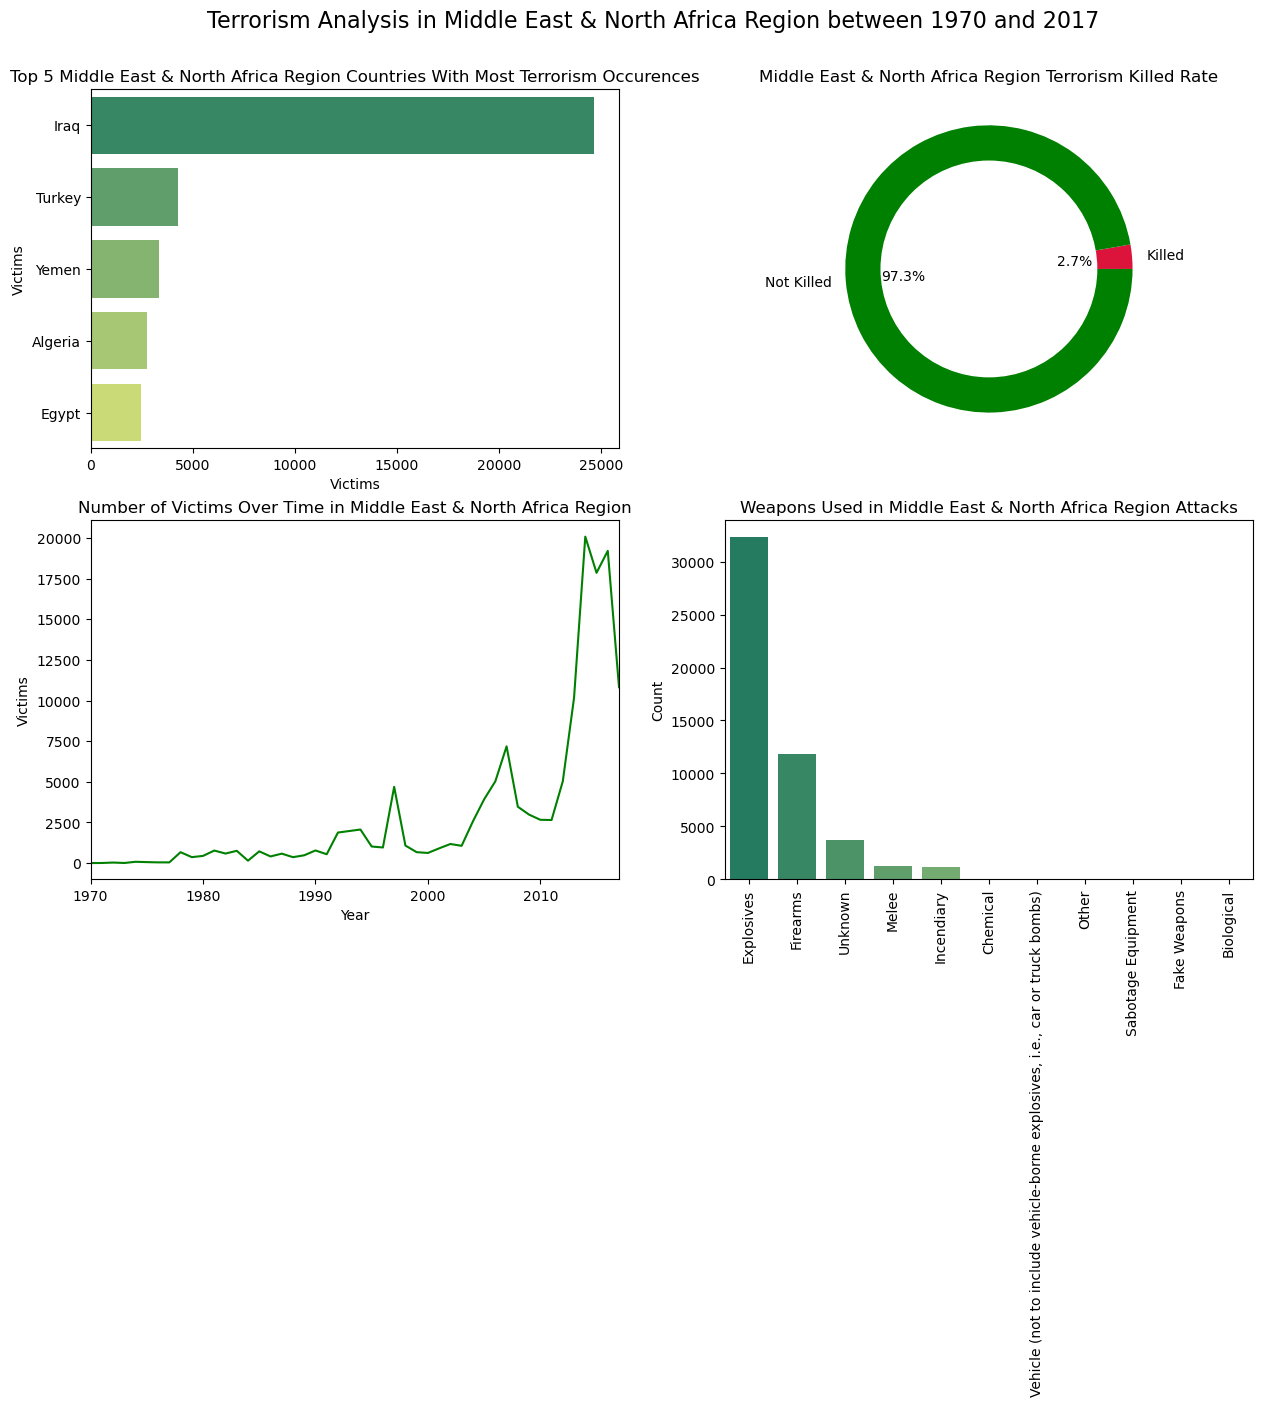

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='Event_ID', y='Country', data=mideast_country, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Middle East & North Africa Region Countries With Most Terrorism Occurences')
axs[0, 0].set_ylabel('Country')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Killed Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((mideast_killed_size, 100-mideast_killed_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Middle East & North Africa Region Terrorism Killed Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=mideast_year, ax=axs[1, 0],color='green')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Number of Victims Over Time in Middle East & North Africa Region')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='Event_ID', data=mideast_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Weapons Used in Middle East & North Africa Region Attacks')

plt.suptitle('Terrorism Analysis in Middle East & North Africa Region between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()

### Iraq Terrorism Analysis

In [39]:
#Preparing the data for analysis
Iraq = terror_data1[terror_data1.Country == 'Iraq']
Iraq_cities = Iraq.groupby(by='City',as_index=False).count().sort_values(by='Event_ID',ascending=False).iloc[:5,]

Iraq_killed_size = Iraq['Killed'].sum() / len(Iraq)
labels = ['Killed', 'Not Killed']

Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Iraq_weapon = Iraq.groupby(by='WeaponType',as_index=False).count().sort_values(by='Event_ID',ascending=False).iloc[:,:2]

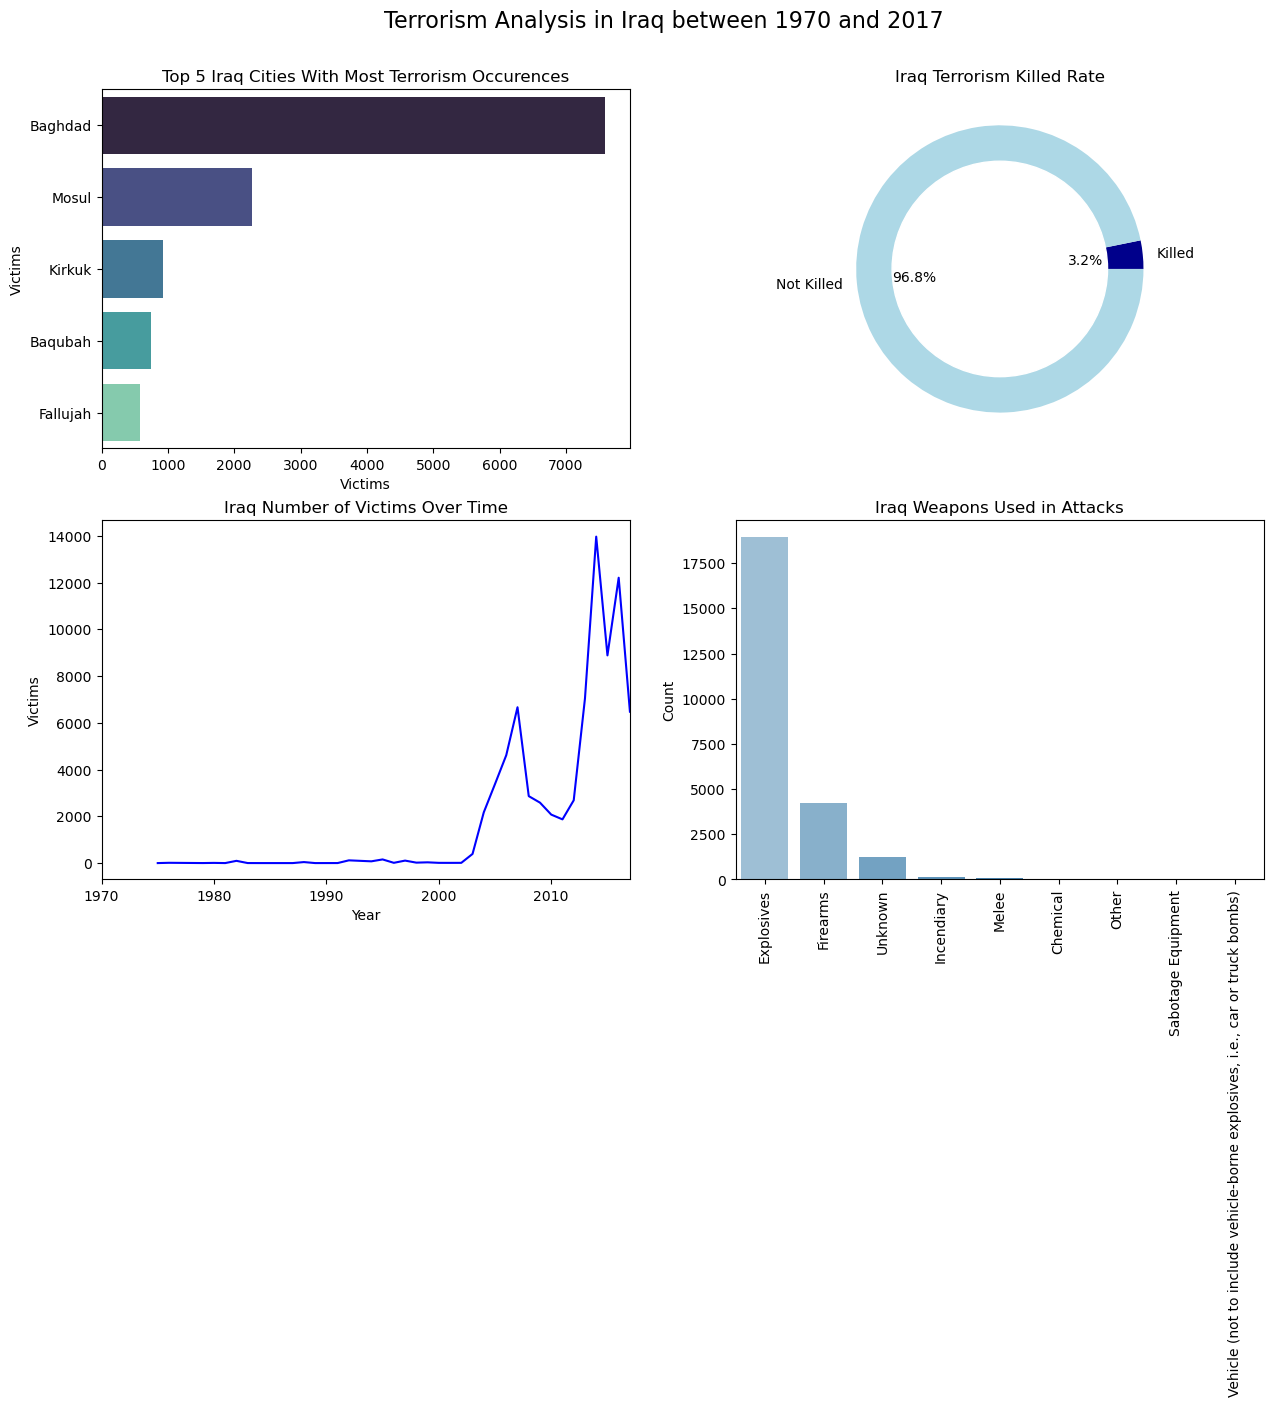

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='Event_ID', y='City', data=Iraq_cities, ci=None, ax=axs[0, 0],palette='mako')
axs[0, 0].set_title(f'Top 5 Iraq Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Iraq_killed_size, 100-Iraq_killed_size), labels=labels,colors=['darkblue','lightblue'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Iraq Terrorism Killed Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0],color='blue')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Iraq Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='Event_ID', data=Iraq_weapon, ci=None, ax=axs[1, 1],palette='Blues_d')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Iraq between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()